In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

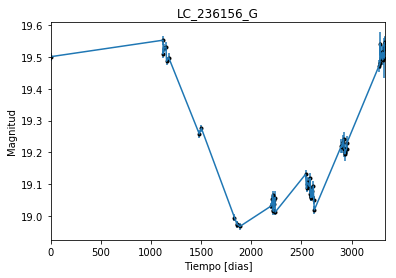

In [2]:
data = np.genfromtxt('LC_236156_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_236156_G')
plt.savefig("LC_236156_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

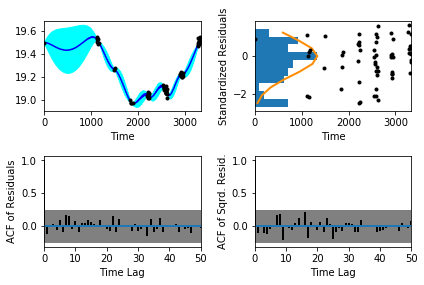

In [5]:
sample.assess_fit()

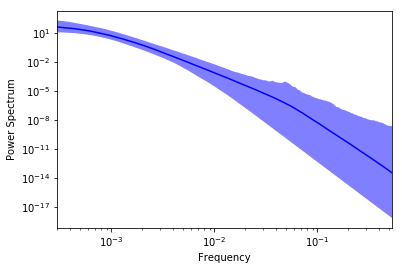

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

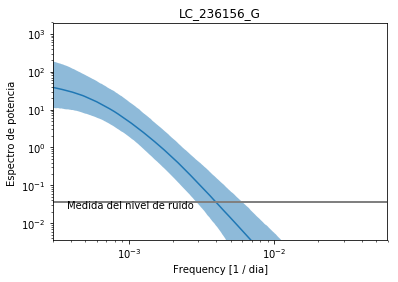

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_236156_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_236156_G')

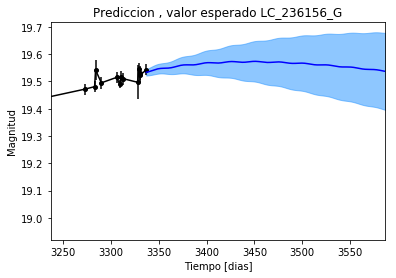

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_236156_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_236156_G')

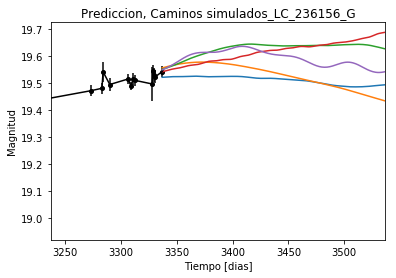

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_236156_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


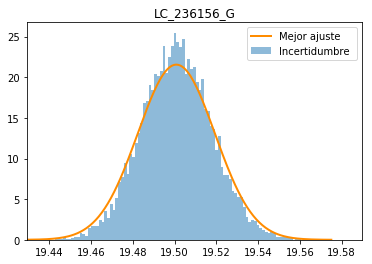

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_236156_G')
plt.savefig("Mejor_ajuste_LC_236156_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_236156_G')

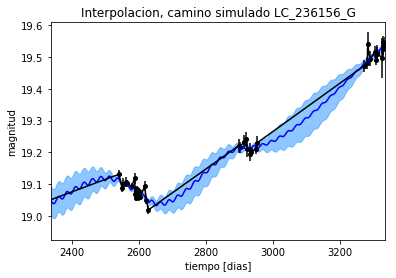

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_G')

Text(0.5,1,'Interpolacion, camino simulado LC_236156_G')

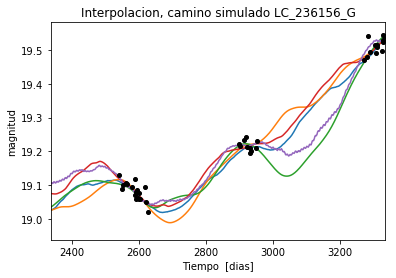

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 3146.66451391
Median: 0.0163362191814
Standard deviation: 0.231829050461
68% credibility interval: [ 0.00093719  0.27395879]
95% credibility interval: [  3.48618315e-04   8.97988997e-01]
99% credibility interval: [  3.10376945e-04   1.04203541e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 393.545527543
Median: 0.000813886975296
Standard deviation: 0.0595950531488
68% credibility interval: [ 0.00038852  0.00905802]
95% credibility interval: [ 0.00031181  0.1490368 ]
99% credibility interval: [  3.01775119e-04   4.70871776e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 672.461881202
Median: 0.0131499011202
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1603.86582275
Median: 159.847903216
Standard deviation: 1.59079683599
68% credibility interval: [ 158.05449948  160.96201143]
95% credibility interval: [ 155.70624922  161.65399822]
99% credibility interval: [ 153.72602852  162.81439801]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 615.731669817
Median: 0.705397767442
Standard deviation: 2.13028447053
68% credibility interval: [ 0.05115905  3.97811314]
95% credibility interval: [ 0.01220669  6.75498164]
99% credibility interval: [  9.40093379e-03   9.68122206e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 627.555070757
Median: 0.160813836752
Standard deviation: 6.48340881157
68% credibility interval: [ 0.01114718  3.12655216]
95% credibility interval: [  8.0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 456.272468697
Median: 4.74894483467e-25
Standard deviation: 3.3871662041e+51
68% credibility interval: [  2.87378166e-49   4.33333152e-08]
95% credibility interval: [  6.42643215e-75   1.55541189e+07]
99% credibility interval: [  2.88488257e-84   5.42602054e+51]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1947.97187136
Median: 19.3484967407
Standard deviation: 0.155731142632
68% credibility interval: [ 19.22564172  19.48533019]
95% credibility interval: [ 19.06305511  19.69084015]
99% credibility interval: [ 18.88800442  19.91043648]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 296.483220785
Median: 0.0
Standard deviation: 0.180452186167
68% credibility interval: [ 0.          0.08940725]
95% credibility interval: [ 0.          0.71241185]
99% credibility interval: [ 0.          0.98953749]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 296.483220785
Median: 0.0
Standard deviation: 0.180452186167
68% credibility interval: [ 0.          0.08940725]
95% credibility interval: [ 0.          0.71241185]
99% credibility interval: [ 0.          0.98953749]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 485.689322123
Median: 0.0
Standard deviation: 0.000172415811757
68% credibility interval: [ 0.

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1603.86582275
Median: 159.847903216
Standard deviation: 1.59079683599
68% credibility interval: [ 158.05449948  160.96201143]
95% credibility interval: [ 155.70624922  161.65399822]
99% credibility interval: [ 153.72602852  162.81439801]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2402.60397758
Median: 0.0619898460299
Standard deviation: 0.0770186901023
68% credibility interval: [ 0.03511541  0.1273127 ]
95% credibility interval: [ 0.02232338  0.27159656]
99% credibility interval: [ 0.01772683  0.42857436]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2224.57267486
Median: 1.2318185096
Standard deviation: 0.18438326571
68% credibility interval: [ 1.06073409  1.42122863]
95% credibility interval: [ 0.9291934  1.654672 ]
99% credibility interval: [ 0.86243642  1.79922754]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 12769.7118919
Median: 2.00530563333e-05
Standard deviation: 0.00955184111756
68% credibility interval: [  1.17756025e-06   3.96731617e-04]
95% credibility interval: [  1.67977779e-11   3.44685412e-03]
99% credibility interval: [  2.53746990e-57   6.89672904e-03]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 3146.66451391
Median: (-0.102643492335+0j)
Standard deviation: 1.84588499864
68% credibility interval: [-1.72133386+0.j         -0.00588854-0.00410922j]
95% credibility interval: [ -5.64223127e+00+0.j          -2.19043347e-03-0.66969052j]
99% credibility interval: [ -6.54730155e+00+0.j          -1.95015586e-03-0.00201293j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 393.545527543
Median: (-0.00511380268488+0j)
Standard deviation: 1.19404595992
68% credibility interval: [-0.05691320+0.21849168j -0.00244116+0.j        ]
95% credibility interval: [-0.93642581 +7.46942433e-01j -0.00195915 +5.73898764e-05j]
99% credibility interval: [ -2.95857462e+00+1.46264666j  -1.89610899e-03+0.j        ]
Posterior summary for parame